In [1]:
# Importing Libraries
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import ast

#loading data
dataset = load_dataset("lukebarousse/data_jobs")
df = dataset['train'].to_pandas()

#data cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'], errors='coerce')
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

d:\Anaconda\envs\cursito\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
#Filter for data analyst
df_DA = df[df['job_title_short'] == 'Data Analyst'].copy()

#Create new column for posted month 
df_DA['job_posted_month_no'] = df_DA['job_posted_date'].dt.month

#Explode the job_skills column and pivot
df_DA_exploded = df_DA.explode('job_skills')
df_DA_pivot = df_DA_exploded.pivot_table(index='job_posted_month_no', columns='job_skills',aggfunc='size', fill_value=0)

#Sort skills by count
df_DA_pivot.loc['Total'] = df_DA_pivot.sum()
df_DA_pivot = df_DA_pivot[df_DA_pivot.loc['Total'].sort_values( ascending=False).index]
df_DA_pivot = df_DA_pivot.drop('Total')

#Use names for plotting
df_DA_pivot = df_DA_pivot.reset_index()
df_DA_pivot['job_posted_month'] = df_DA_pivot['job_posted_month_no'].apply(lambda x: pd.to_datetime(x, format='%m').strftime('%b'))
df_DA_pivot = df_DA_pivot.set_index('job_posted_month')
df_DA_pivot = df_DA_pivot.drop(columns='job_posted_month_no')



Customization graphs : matplotlib.org/cheatsheets/

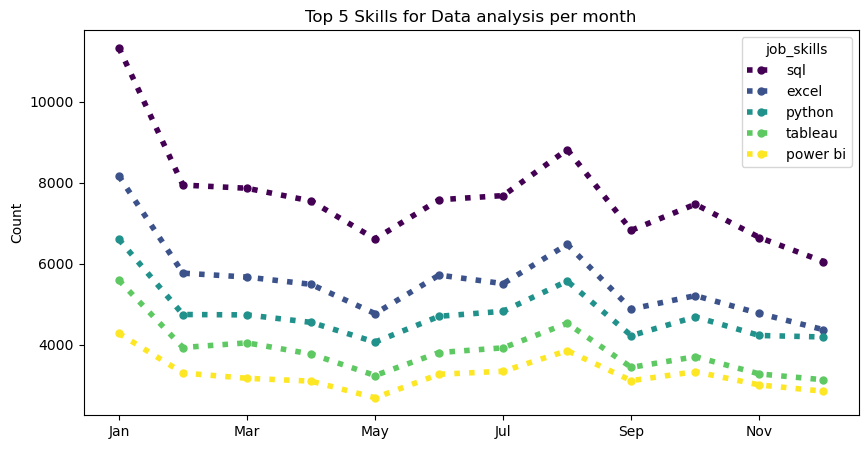

In [4]:
#get the top 5 skills
df_DA_pivot.iloc[:, :5].plot( #:5 es lo mismo q 0:5 agarra las primeras 5
    kind='line',
    linewidth=4,
    linestyle=':', # options: '-', '--', '-.', ':'
    colormap='viridis',
    marker='o', #options: 'o', 'x', '+', '*', 's', ',', '.', '1', '2', '3', '4', ...
    markersize=5,
    figsize=(10,5)
    ) 

plt.title('Top 5 Skills for Data analysis per month')
plt.ylabel('Count')
plt.xlabel('')
plt.show()

adjusttext.readthedocs.io   

In [5]:
df_exploded = df_DA.explode('job_skills')

skill_stats = df_exploded.groupby(['job_skills']).agg(
    skill_count=('job_skills','count'),
    median_salary=('salary_year_avg','median')
)

#Limit to the top skills
skill_count = 20
skill_stats = skill_stats.sort_values(by='skill_count', ascending=False).head(skill_count)
#when we use scatter plots and there is many values it can be unreadable so we need to use adjusttext for that
skill_stats


,skill_count,median_salary
job_skills,,
sql,92428,92500.000000
excel,66860,84479.000000
python,57190,98500.000000
tableau,46455,95000.000000
power bi,39380,90000.000000
r,29996,92527.500000
sas,27998,90000.000000
powerpoint,13822,85000.000000
word,13562,80000.000000


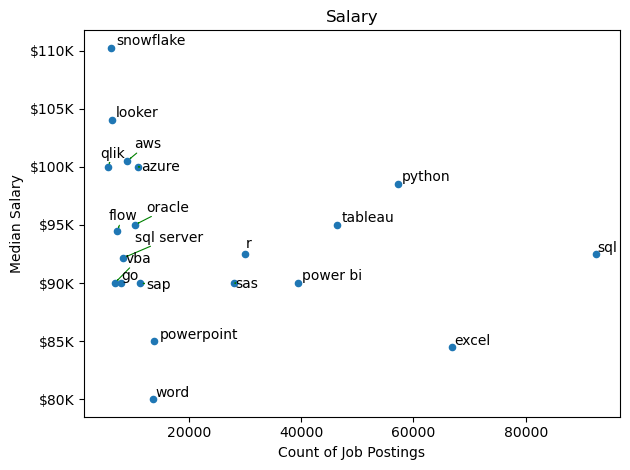

In [7]:
from matplotlib.patches import ArrowStyle
from adjustText import adjust_text

skill_stats.plot(kind='scatter', x='skill_count', y='median_salary')

texts = []
for i, txt in enumerate(skill_stats.index):
    texts.append(plt.text(skill_stats['skill_count'].iloc[i], skill_stats['median_salary'].iloc[i], txt))
    
ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K'))
        
adjust_text(texts, arrowprops =dict(arrowstyle="->", color='g', lw=0.8))  
    
plt.xlabel('Count of Job Postings')
plt.ylabel('Median Salary')
plt.title('Salary')
plt.tight_layout()
plt.show()

Skill percentage in all the jobs postings on X

{'sql': 0.58, 'python': 0.57, 'aws': 0.22, 'azure': 0.2, 'r': 0.2, 'tableau': 0.19, 'excel': 0.19, 'spark': 0.17, 'power bi': 0.15, 'java': 0.13}


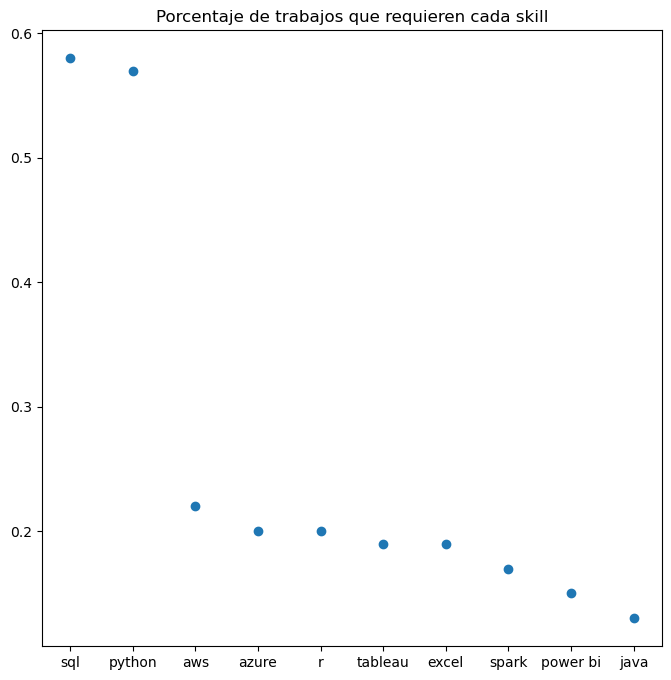

In [23]:
from ctypes import Array
from matplotlib.patches import ArrowStyle
from adjustText import adjust_text
from numpy import dtype

df_copy = df.dropna(subset=['job_skills']).copy()

total_jobs = df_copy['job_title_short'].count()
exploded_df = df_copy.explode('job_skills')
exploded_df['total_jobs'] = total_jobs
total_jobs
unique_skills = exploded_df['job_skills'].unique().tolist()
total_skills = exploded_df.pivot_table( columns='job_skills', aggfunc='size').nlargest(10).sort_values(ascending=False)
#total_skills = total_skills.groupby(['job_skills', 'job_title_short'])
top_skills = total_skills.index.to_list()
top_skills
skills_count = total_skills.values.tolist()
skills_dict = {skill: count / total_jobs for skill, count in zip(top_skills, skills_count)}
clean_dict = {
    k: round(float(v), 2)
    for k, v in skills_dict.items()
}
print(clean_dict)


plt.figure(figsize=(8,8))
plt.scatter(y=list(clean_dict.values()), x=list(clean_dict.keys()))
plt.title("Porcentaje de trabajos que requieren cada skill")
plt.show()

#for value in skills:
    #values = (value / total_jobs)
    #percentaje = {job_skill: job_skill for job_skill in top_skills }
    #percentaje[job_skill]
    #percentaje.append(values)
    #percentaje[key].append(values)
    
#print(percentaje)

# skill_stats = exploded_df.groupby(['job_skills', 'total_jobs']).agg(
 #   skill_count=('job_skills','count')
#).sort_values(by='skill_count', ascending=False).head(10)

#skill_stats """